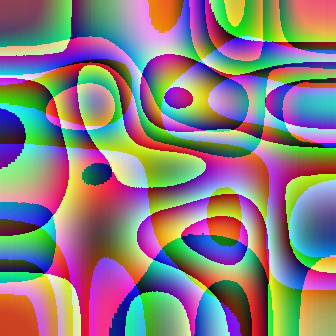

In [1]:
import numpy as np
from PIL import Image


OPENAI_CLIP_MEAN = [0.48145466, 0.4578275, 0.40821073, 0.5]
OPENAI_CLIP_STD = [0.26862954, 0.26130258, 0.27577711, 1]
H = 5
W = 5
C = 3
resample = 3
H_O = 336
W_O = 336

# random array
array = np.random.rand(H, W, C) * 255
if C == 4:
    array[:, :, 3] = np.random.rand(H, W) * 255

# resize
image = Image.fromarray(array.astype(np.uint8))
image = image.resize((H_O, W_O), resample=resample)
array  = np.array(image)

# # rescale
array = array / 255.0

# # normalize
mean = np.array(OPENAI_CLIP_MEAN[:C])
std = np.array(OPENAI_CLIP_STD[:C])
array = (array - mean) / std

image = Image.fromarray((array * 255).astype(np.uint8), "RGBA" if C == 4 else "RGB")
image.convert("RGB").show()